In [3]:
import time
from IPython.display import clear_output
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class OneMax:
    def __init__(self,target_sequence,dna=''):
        
        self.letters = '01'
        self.target_sequence = target_sequence
        self.length = len(target_sequence)
        
        #переписать понятнее
        if dna != '':
            self.dna = dna
        else:
            self.dna = ''.join([self.letters[random.randint(0,1)] for i in range(self.length)])
        
        self.fitness = len([self.dna[i] for i in range(self.length) if self.dna[i]==target_sequence[i]])
    

    def mutate(self):
        #переписать понятнее
        pos = np.random.randint(0,self.length)
        #print(pos)
        # if self.sequence[pos]=='0':
        #     self.sequence=self.sequence[:pos]+'1'+self.sequence[pos:]
        # else:
        #     self.sequence=self.sequence[:pos]+'0'+self.sequence[pos:]
        #или
         
        dna = self.dna[:pos]+'1'+self.dna[pos+1:] if self.dna[pos] == '0' else self.dna[:pos]+'0'+self.dna[pos+1:]
        return OneMax(self.target_sequence,dna)
        
        
    def recombinate(self,other):
        a = np.random.randint(0,self.length)
        l = list(range(self.length))
        l.remove(a)
        b = np.random.choice(l)
        a,b = tuple(sorted([a,b]))
    
        dna = self.dna[:a]+other.dna[a:b]+self.dna[b:]
        return OneMax(self.target_sequence,dna)

In [41]:
def search_seq(target_sequence,pop_size,keep_size,spawn_size,mr=0.5,rr=0.1):
    
    # создаём начальную популяцию
    pop = np.array([OneMax(target_sequence) for i in range(pop_size)],dtype='object')
    
    history = np.empty((0,2,pop_size),dtype='object')
    
    # цикл обучения
    while(True):
        
        # спавн случайных точек
        spawn = [OneMax(target_sequence) for i in range(spawn_size)]
        pop = np.append(pop,spawn)
        
        # мутации и рекомбинации
        for j in range(pop_size+spawn_size):
            if np.random.random() < mr:
                new_pop = pop[j].mutate()
                pop = np.append(pop,new_pop) 
            if np.random.random() < rr:
                new_pop = pop[j].recombinate(pop[np.random.randint(pop_size+spawn_size)])
                pop = np.append(pop,new_pop)
        
        # отбор по fitness
        pop = sorted(pop,key = lambda x: x.fitness,reverse=True)
        pop=pop[:keep_size]
        
        # размножение оставшихся
        if pop_size-keep_size > 0 and i > 3:
            pop = np.append(pop,np.random.choice(a=pop,size=pop_size-keep_size))
        
        history = np.append(history,[[[p.fitness for p in pop],pop]],axis=0)
        
        clear_output(wait = True)
        time.sleep(0.01)
        if len(history) > 1:
            l=''.join(['-' if history[-1,1,0].dna[i] == history[-2,1,0].dna[i] else '+' for i in range(len(target_sequence))])
            plt.title(history[-1,1,0].dna+'\n'+l,{'fontsize': 12})
        plt.plot(history[:,0,0])
        plt.show()
        # print(history[-1,1,0].dna)
        if history[-1,1,0].fitness == len(target_sequence): break
        
    
    # fig1, ax1 = plt.subplots()
    # ax1.plot(history[:,0,0])
    # plt.show()
    return history

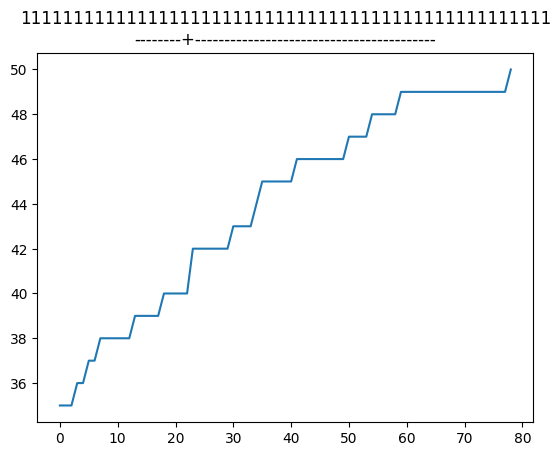

In [45]:
h=search_seq('1'*50,20,20,0)

In [46]:
import random